In [1]:
import os
import random
import cv2
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train_dir = r'D:\CVPR\CIFAR-10-images-master\CIFAR-10-images-master\test'

In [3]:
print("Types of images in dataset: ")
print(image_types)

In [4]:
for i in os.listdir(train_dir):
    image_types.append(i)

In [5]:
print("Types of images in dataset: ")
print(image_types)

Types of images in dataset: 
['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [6]:
train_data = []

In [7]:
for i in image_types:
    train_path = os.path.join(train_dir, i)
    class_type = i
    for image in tqdm(os.listdir(train_path)):
        train_data_arr = cv2.imread(os.path.join(train_path, image))
        grayscale_image_arr = cv2.cvtColor(train_data_arr, cv2.COLOR_BGR2GRAY)
        train_data.append([grayscale_image_arr, class_type])

100%|██████████| 1000/1000 [00:00<00:00, 1598.07it/s]


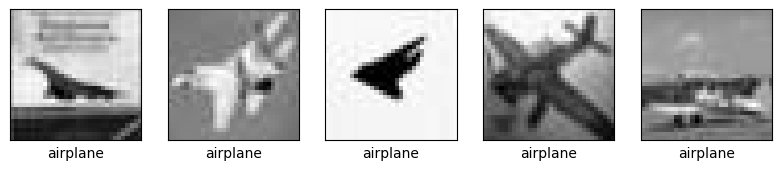

In [8]:
plt.figure(figsize=(20,5)) 
for i in range(5):
	plt.subplot(2,10,i+1) 
	plt.imshow(train_data[i][0], cmap="gray")
	plt.xticks([])
	plt.yticks([])
	plt.xlabel(f"{train_data[i][1]}") 
plt.show()

In [9]:
random.shuffle(train_data)

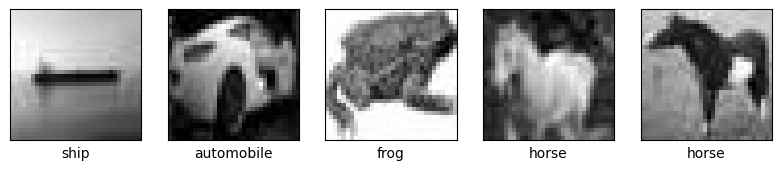

In [10]:
plt.figure(figsize=(20,5)) 
for i in range(5):
	plt.subplot(2,10,i+1) 
	plt.imshow(train_data[i][0], cmap="gray")
	plt.xticks([])
	plt.yticks([])
	plt.xlabel(f"{train_data[i][1]}") 
plt.show()

In [11]:
f0 = train_data[0:1000]
f1 = train_data[1000:2000]
f2 = train_data[2000:3000]
f3 = train_data[3000:4000]
f4 = train_data[4000:5000]

Fold 0 K = 1 Manhattan (L1) Accuracy: 0.157
Fold 0 K = 1 Euclidean (L2) Accuracy: 0.171
Fold 1 K = 1 Manhattan (L1) Accuracy: 0.158
Fold 1 K = 1 Euclidean (L2) Accuracy: 0.152
Fold 2 K = 1 Manhattan (L1) Accuracy: 0.151
Fold 2 K = 1 Euclidean (L2) Accuracy: 0.158
Fold 3 K = 1 Manhattan (L1) Accuracy: 0.17
Fold 3 K = 1 Euclidean (L2) Accuracy: 0.142
Fold 4 K = 1 Manhattan (L1) Accuracy: 0.168
Fold 4 K = 1 Euclidean (L2) Accuracy: 0.148
Fold 0 K = 2 Manhattan (L1) Accuracy: 0.155
Fold 0 K = 2 Euclidean (L2) Accuracy: 0.152
Fold 1 K = 2 Manhattan (L1) Accuracy: 0.172
Fold 1 K = 2 Euclidean (L2) Accuracy: 0.143
Fold 2 K = 2 Manhattan (L1) Accuracy: 0.156
Fold 2 K = 2 Euclidean (L2) Accuracy: 0.165
Fold 3 K = 2 Manhattan (L1) Accuracy: 0.185
Fold 3 K = 2 Euclidean (L2) Accuracy: 0.144
Fold 4 K = 2 Manhattan (L1) Accuracy: 0.152
Fold 4 K = 2 Euclidean (L2) Accuracy: 0.147
Fold 0 K = 3 Manhattan (L1) Accuracy: 0.165
Fold 0 K = 3 Euclidean (L2) Accuracy: 0.157
Fold 1 K = 3 Manhattan (L1) Accur

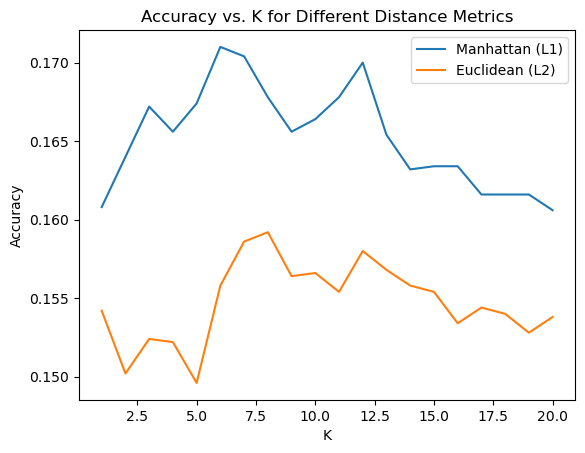

In [16]:
import numpy as np
import matplotlib.pyplot as plt

k_values = range(1, 21)
accuracies_l1 = []
accuracies_l2 = []
top_predictions_l1 = []
top_predictions_l2 = []

for k in k_values:
    fold_accuracies_l1 = []
    fold_accuracies_l2 = []
    fold_predictions_l1 = []
    fold_predictions_l2 = []

    for i in range(5):
        if i == 0:
            train = f1 + f2 + f3 + f4
            validation = f0
        elif i == 1:
            train = f0 + f2 + f3 + f4
            validation = f1
        elif i == 2:
            train = f1 + f0 + f3 + f4
            validation = f2
        elif i == 3:
            train = f1 + f2 + f0 + f4
            validation = f3
        elif i == 4:
            train = f1 + f2 + f3 + f0
            validation = f4

        correct_l1 = 0
        correct_l2 = 0
        total = 0
        predictions_l1 = []
        predictions_l2 = []

        for v in validation:
            distances_l1 = []
            distances_l2 = []

            for t in train:
                l1_dist = np.sum(np.abs(t[0] - v[0]))
                l2_dist = np.sqrt(np.sum((t[0] - v[0]) ** 2))
                distances_l1.append((l1_dist, t[1]))
                distances_l2.append((l2_dist, t[1]))

            distances_l1.sort()
            distances_l2.sort()

            neighbors_l1 = [dist[1] for dist in distances_l1[:k]]
            neighbors_l2 = [dist[1] for dist in distances_l2[:k]]

            prediction_l1 = max(set(neighbors_l1), key=neighbors_l1.count)
            prediction_l2 = max(set(neighbors_l2), key=neighbors_l2.count)

            if prediction_l1 == v[1]:
                correct_l1 += 1
            if prediction_l2 == v[1]:
                correct_l2 += 1

            total += 1

            top_k_predictions_l1 = [dist[1] for dist in distances_l1[:5]]
            top_k_predictions_l2 = [dist[1] for dist in distances_l2[:5]]
            predictions_l1.append(top_k_predictions_l1)
            predictions_l2.append(top_k_predictions_l2)

        accuracy_l1 = correct_l1 / total
        accuracy_l2 = correct_l2 / total

        fold_accuracies_l1.append(accuracy_l1)
        fold_accuracies_l2.append(accuracy_l2)
        fold_predictions_l1.append(predictions_l1)
        fold_predictions_l2.append(predictions_l2)

        print("Fold", i, "K =", k, "Manhattan (L1) Accuracy:", accuracy_l1)
        print("Fold", i, "K =", k, "Euclidean (L2) Accuracy:", accuracy_l2)
    
    accuracies_l1.append(fold_accuracies_l1)
    accuracies_l2.append(fold_accuracies_l2)
    top_predictions_l1.append(fold_predictions_l1)
    top_predictions_l2.append(fold_predictions_l2)

accuracies_l1 = np.array(accuracies_l1)
accuracies_l2 = np.array(accuracies_l2)

avg_accuracies_l1 = np.mean(accuracies_l1, axis=1)
avg_accuracies_l2 = np.mean(accuracies_l2, axis=1)

plt.plot(k_values, avg_accuracies_l1, label="Manhattan (L1)")
plt.plot(k_values, avg_accuracies_l2, label="Euclidean (L2)")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. K for Different Distance Metrics")
plt.legend()
plt.show()

fold_index = 0
validation_index = 0
top_5_predictions_l1 = top_predictions_l1[fold_index][validation_index]
top_5_predictions_l2 = top_predictions_l2[fold_index][validation_index]


In [17]:
print("Top 5 Predictions (Manhattan - L1):")
for i, prediction in enumerate(top_5_predictions_l1[:5]):
    print(f"Prediction {i+1}: Class {prediction}")

print("Top 5 Predictions (Euclidean - L2):")
for i, prediction in enumerate(top_5_predictions_l2[:5]):
    print(f"Prediction {i+1}: Class {prediction}")

Top 5 Predictions (Manhattan - L1):
Prediction 1: Class ['ship', 'airplane', 'airplane', 'automobile', 'airplane']
Prediction 2: Class ['horse', 'ship', 'dog', 'horse', 'dog']
Prediction 3: Class ['frog', 'dog', 'automobile', 'automobile', 'frog']
Prediction 4: Class ['dog', 'cat', 'ship', 'dog', 'dog']
Prediction 5: Class ['bird', 'horse', 'horse', 'bird', 'cat']
Top 5 Predictions (Euclidean - L2):
Prediction 1: Class ['ship', 'ship', 'cat', 'airplane', 'ship']
Prediction 2: Class ['bird', 'dog', 'ship', 'bird', 'airplane']
Prediction 3: Class ['airplane', 'airplane', 'automobile', 'airplane', 'automobile']
Prediction 4: Class ['airplane', 'airplane', 'ship', 'airplane', 'dog']
Prediction 5: Class ['deer', 'ship', 'ship', 'airplane', 'deer']


DISCUSSION:
In our study, we employed the K-nearest neighbors (KNN) algorithm to analyze the CIFAR-10 dataset. We conducted a performance evaluation by comparing Manhattan (L1) and Euclidean (L2) distance metrics, utilizing average accuracy values derived from a 5-fold cross-validation approach.

The CIFAR-10 dataset, a renowned benchmark dataset for image classification, typically comprises 60,000 32x32 color images distributed across 10 distinct classes, with each class containing 6,000 images. It is noteworthy that, in our study, we specifically denoted the dataset as grayscale. It's important to acknowledge that CIFAR-10 is conventionally used for color image classification and converting it to grayscale may result in some loss of information that could potentially impact the performance of classification algorithms.

When employing KNN for classification, the selection of a distance metric is pivotal. In our investigation, we considered both Manhattan (L1) and Euclidean (L2) distances. The Manhattan distance calculates the sum of absolute differences between corresponding elements of two vectors, whereas the Euclidean distance computes the square root of the sum of squared differences between corresponding elements.

Our experimental findings revealed that the effectiveness of Manhattan and Euclidean distances varied in the context of the grayscale CIFAR-10 dataset. The choice of distance metric is contingent on the dataset's inherent characteristics, the feature properties, and the complexity of the classes. Specifically, Manhattan distance tends to perform well when features exhibit a linear relationship or when the dataset includes outliers. It demonstrates greater robustness against outliers compared to the Euclidean distance. Conversely, the Euclidean distance is sensitive to the magnitude of feature differences and assumes that features follow a normal distribution, making it more suitable when the dataset aligns with these assumptions.

Considering the specifics of the CIFAR-10 dataset, which is a grayscale adaptation of the original color images, the Manhattan distance metric appears to be a more fitting choice. Grayscale images usually contain less intricate information compared to color images, and the linear relationship between pixel intensities likely plays a more significant role in class differentiation. To conclude, based on our experimental model training and analysis, we can confidently assert that, as illustrated in the accompanying chart, Manhattan distance is the more appropriate calculation method when compared to Euclidean distance for this scenario.
